# Installation

In [ ]:
!pip install numpy pandas matplotlib scikit-learn seaborn

# 1.Importing

In [61]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2.Load Dataset

In [62]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [63]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The dataset contains 150 samples of iris flowers, with three species:

- Iris setosa
- Iris versicolor
- Iris virginica

The target variable consists of three classes corresponding to the three iris species, making it a multiclass classification problem.

# 3.Features

In [64]:
X = iris.data  # Features
y = iris.target

# 4.Preprocess Data

# 5.Split the Data into Training and Test Sets

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6.Create Model

In [66]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 7.Train the model

In [67]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 8.Make Predictions

In [68]:
y_pred = model.predict(X_test)

In [69]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

## 8.1 Custom Prediction

In [70]:
new_prediction = model.predict([[5.5, 2.4, 3.8, 1.1]])
classes = ["Setosa", "Versicolor", "Virginica"]
print(f"Predicted Flower: {classes[new_prediction[0]] if new_prediction[0] in range(len(classes)) else 'None' }")

Predicted Flower: Versicolor


## 8.2 Why Random Forest Classifier used for?
Random Forest Classification is used when your output variable is categorical.

# Evaluation Metrics

In [71]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

In [72]:
print(f"Accuracy  : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall    : {recall}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy  : 1.0
Precision : 1.0
Recall    : 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# 10.Visualization

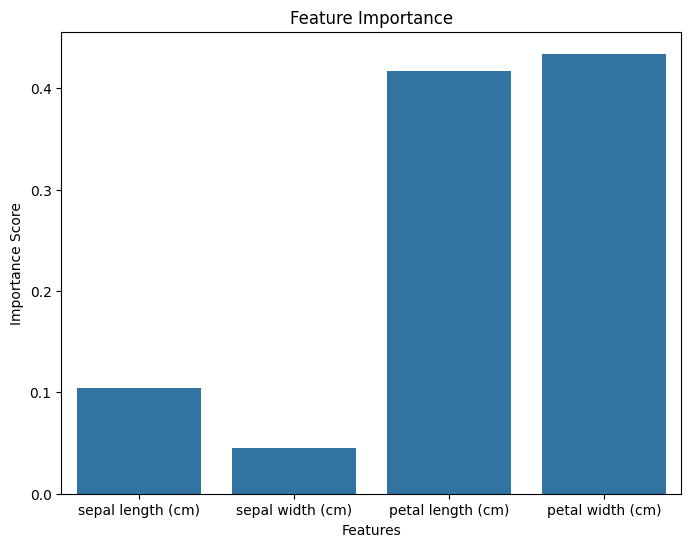

In [73]:
feature_importances = model.feature_importances_

plt.figure(figsize=(8, 6))
sns.barplot(x=iris.feature_names, y=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

# 11. Regression

[1 0 2 2 2 0 1 2 2 1 2 0 0 0 0 1 2 1 2 2 0 2 0 2 2 2 2 2 0 0]
Predicted sepal width: 1.9239095238095243
Mean Absolute Error (MAE): 0.17530978861552401
Mean Squared Error (MSE): 0.04300294667560693
Root Mean Squared Error (RMSE): 0.2073715184773621
R² Score: 0.9323486654057119


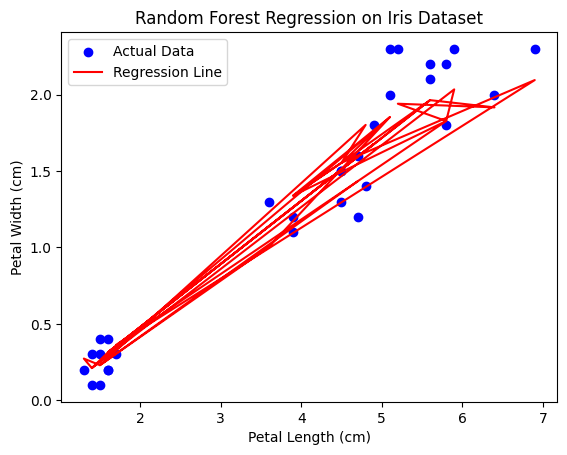

In [74]:
# Step 3: Extract Features
X = df[['petal_length']].values  # Features
y = df['petal_width'].values    # Target

# Step 5: Split the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create the Model (Decision Tree Regressor)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 7: Train the Model
regressor.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = regressor.predict(X_test)
# Since this is a regression, we need to round predictions to get integer values.
y_pred_rounded = np.round(y_pred).astype(int)
print(y_pred_rounded)

# Step 8.1 Custom Predictions
prediction = regressor.predict(np.array([[5.5]]))
print(f"Predicted sepal width: {prediction[0]}")

# Step 9: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Step 10:  Visualization - Random Forest Regression

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Random Forest Regression on Iris Dataset')
plt.legend()
plt.show()

# 11. Why Random Forest Regression used for?
Random Forest Regression is used when your output variable is continuous.